In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Functions

In [17]:
from tqdm.notebook import tqdm

def get_contenct(patient_folder_adrs,d=0):
  if d == 0:
    folder_adrs = sorted(glob(patient_folder_adrs+"/*"))[0]
    type_of = "post"
  else:
    folder_adrs = sorted(glob(patient_folder_adrs+"/*"))[1]
    type_of = "pre"

  op_type = os.path.basename(os.path.normpath(folder_adrs))

  for i in sorted(glob(folder_adrs+"/*")):
    h = os.path.basename(os.path.normpath(i)).split("_")
    patient_id = h[0]
    if h[1] == "heartrate" and h[2] == "seconds":
      break
  return i,patient_id,type_of

#Importing Folder

In [18]:
from glob import glob
import os

path = "/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate"

#Starting

In [19]:
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
g= sorted(glob(path+"/*"))[0]

add,pid,state = get_contenct(g,1)
print(add)
print(pid)
print(state)

/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate/001-JV/001 Pre-op/001-JV_heartrate_seconds_20211202_20221216.csv
001-JV
pre


In [21]:
import pandas as pd
df = pd.read_csv(add)

In [22]:
time = []
hr = []
rr = []

for i in tqdm(range(df.shape[0])):
  time.append(df["Time"][i])
  hr.append(df["Value"][i])
  rr.append(60/df["Value"][i])

d = {
    "Time" : time,
     "HR"  : hr,
     "RR"  : rr
}

  0%|          | 0/350946 [00:00<?, ?it/s]

In [23]:
df2 = pd.DataFrame(d)

In [24]:
df2.head()

,Time,HR,RR
0,12/7/2021 3:52:33 PM,70,0.857143
1,12/7/2021 3:52:48 PM,70,0.857143
2,12/7/2021 3:52:58 PM,67,0.895522
3,12/7/2021 3:53:03 PM,65,0.923077
4,12/7/2021 3:53:18 PM,65,0.923077


#Time Domain Module

##∆NNI Parameters: nni_differences_parameters()

In [25]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]#.values

# Compute parameters
results = td.nni_parameters(nni)

# Print minimum NNI
print(results)

ReturnTuple(nni_counter=350946, nni_mean=840.803132105794, nni_min=384, nni_max=1463)


##Heart Rate Parameters: hr_parameters()

In [26]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute parameters
results = td.hr_parameters(nni)

# Print maximum HR
print(results)

ReturnTuple(hr_mean=72.41625613540528, hr_min=41.01161995898838, hr_max=156.25, hr_std=9.276409357931561)


##SDNN: sdnn()

In [27]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute SDNN parameter
results = td.sdnn(nni)

# Print SDNN
print(results)


ReturnTuple(sdnn=97.23349747288113)


##SDNN Index: sdnn_index()

In [28]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute SDNN Index parameter
results = td.sdnn_index(nni)

# Print SDNN index
print(results)

ReturnTuple(sdnn_index=44.774174511458156)


##SDANN: sdann()

In [29]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]
# Compute SDANN parameter
results = td.sdann(nni)

# Print SDANN
print(results)

ReturnTuple(sdann=81.32464084662483)


##RMSSD: rmssd()

In [30]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute RMSSD parameter
results = td.rmssd(nni)

# Print RMSSD
print(results)

ReturnTuple(rmssd=16.412439626706256)


##SDSD: sdsd()

In [31]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute SDSD parameter
results = td.sdsd(nni)

# Print SDSD
print(results)

ReturnTuple(sdsd=12.534454948880143)


##NNXX: nnXX()

In [32]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute NNXX parameters using the NNI series and a threshold of 30ms
results30 = td.nnXX(nni, threshold=30)
print(results30)

# Compute NNXX parameters using the NNI series and a threshold of 35ms
results35 = td.nnXX(nni, threshold=35)
print(results35)

ReturnTuple(nn30=19304, pnn30=5.500577013492142)
ReturnTuple(nn35=13973, pnn35=3.9815355682514353)


##NN50: nn50()

In [33]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute NN50 parameters using the NNI series
results50 = td.nn50(nni)
print(results50)

ReturnTuple(nn50=4429, pnn50=1.2620211144196383)


##NN20: nn20()

In [34]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute NN20 parameters using the NNI series
results = td.nn20(nni)
print(results)

ReturnTuple(nn20=47577, pnn20=13.55682514354101)


##Geometrical Parameters

###TINN: tinn()

/usr/local/lib/python3.9/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


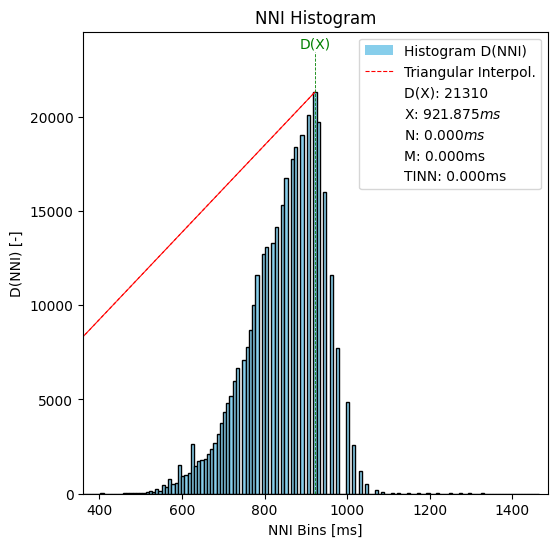

ReturnTuple(tinn_histogram=<Figure size 600x600 with 1 Axes>, tinn_n=0, tinn_m=0, tinn=0)


In [35]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute TINN parameters using the NNI series
results = td.tinn(nni)

# Print TINN and th N value
print(results)

###Triangular Index: triangular_index()

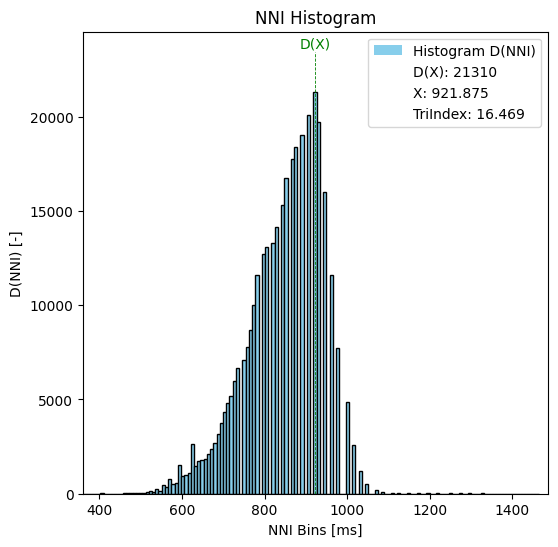

ReturnTuple(tri_histogram=<Figure size 600x600 with 1 Axes>, tri_index=16.46860628812764)


In [36]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute Triangular Index using the NNI series
results = td.triangular_index(nni)

# Print Triangular Index
print(results)

###Geometrical Parameters Function: geometrical_parameters()

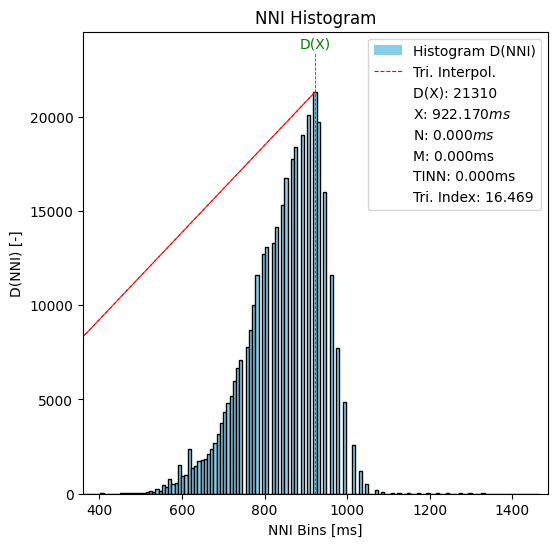

ReturnTuple(nni_histogram=<Figure size 600x600 with 1 Axes>, tinn_n=0, tinn_m=0, tinn=0, tri_index=16.46860628812764)


In [37]:
# Import packages
import pyhrv
import pyhrv.time_domain as td

# Load sample data
nni = df2["RR"]

# Compute Geometrical Parameters using the NNI series
results = td.geometrical_parameters(nni)

# Print Geometrical Parameters
print(results)

#Frequency Domain Module


##Welch’s Method: welch_psd()

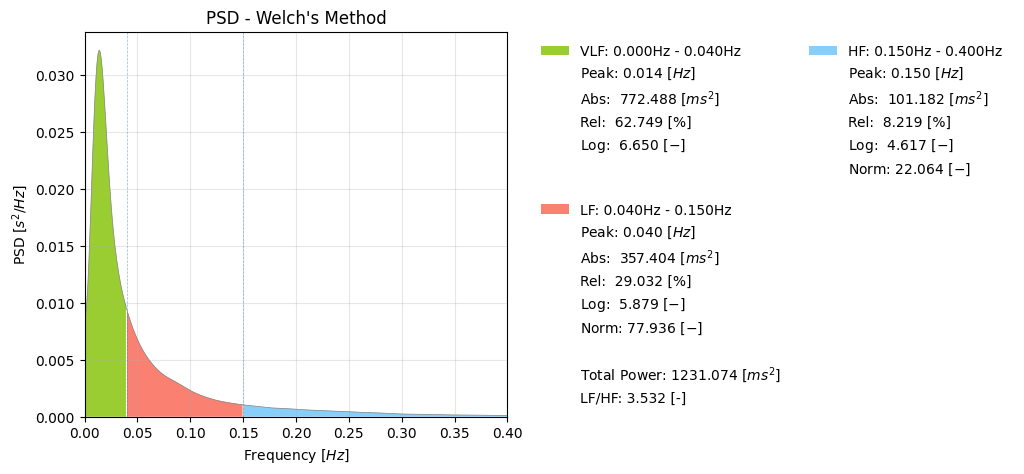

ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.013671875, 0.0400390625, 0.150390625), fft_abs=(772.4878611668571, 357.40365010715215, 101.18247720832358), fft_rel=(62.74910106086959, 29.031857829094342, 8.219041110036065), fft_log=(6.6496162949485775, 5.87886581561988, 4.616925591745773), fft_norm=(77.9359925690214, 22.064007430978606), fft_ratio=3.53226823426449, fft_total=1231.0739884823329, fft_plot=<Figure size 1200x500 with 2 Axes>, fft_nfft=4096, fft_window='hamming', fft_resampling_frequency=4, fft_interpolation='cubic')


In [40]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSD and frequency domain parameters using the NNI series
result = fd.welch_psd(nni)

# Access peak frequencies using the key 'fft_peak'
print(result)

###Welch PSD with custom frequency bands.

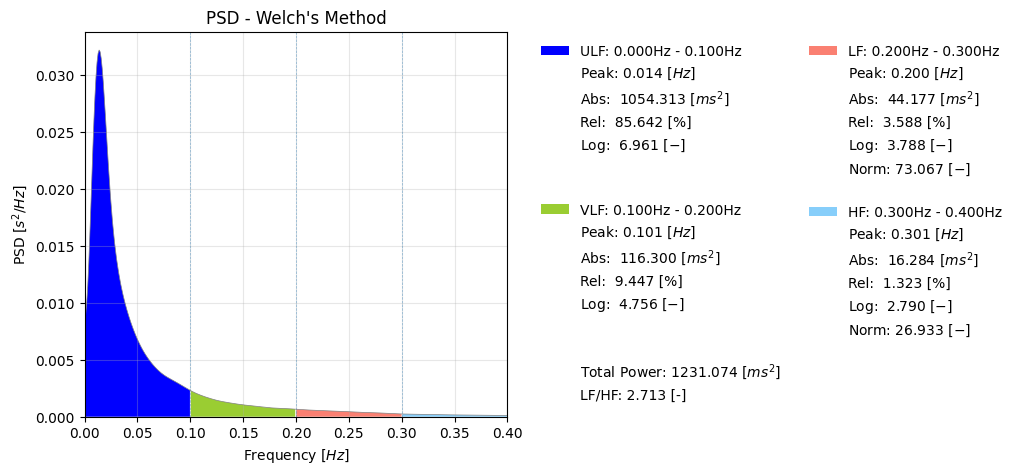

In [41]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.welch_psd(nni, fbands=fbands)

###PSD plot without parameters.

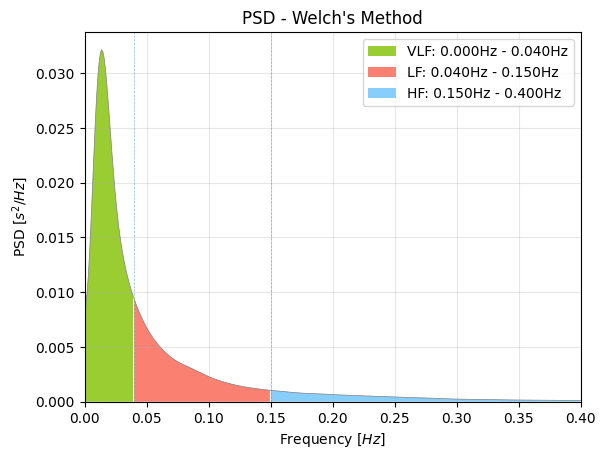

In [42]:
# Compute the PSD without the parameters being shown on the right side of the figure
result = fd.welch_psd(nni, show_param=False)

##Lomb-Scargle Periodogram: lomb_psd()

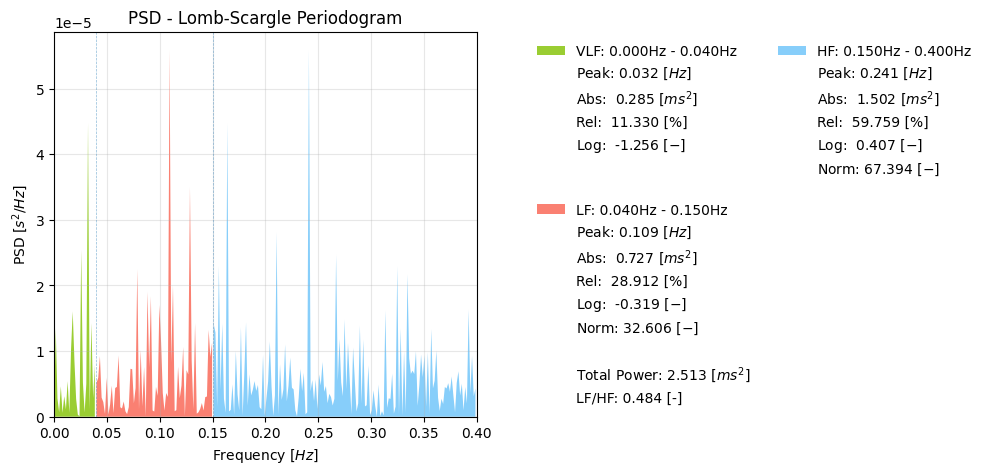

ReturnTuple(lomb_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), lomb_peak=(0.03215686274509804, 0.10933333333333334, 0.2411764705882353), lomb_abs=(0.2847457759700602, 0.7266367283710354, 1.5019219556697496), lomb_rel=(11.329537686366557, 28.911607802896267, 59.75885451073718), lomb_log=(-1.2561585109349864, -0.3193286122052351, 0.4067455917188252), lomb_norm=(32.605680683871874, 67.39431931612813), lomb_ratio=0.48380458493730955, lomb_total=2.513304460010845, lomb_plot=<Figure size 1200x500 with 2 Axes>, lomb_nfft=256, lomb_ma=None)


In [43]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSD and frequency domain parameters using the NNI series
result = fd.lomb_psd(nni)

# Access peak frequencies using the key 'lomb_peak'
print(result)

###Lomb PSD with custom frequency bands.



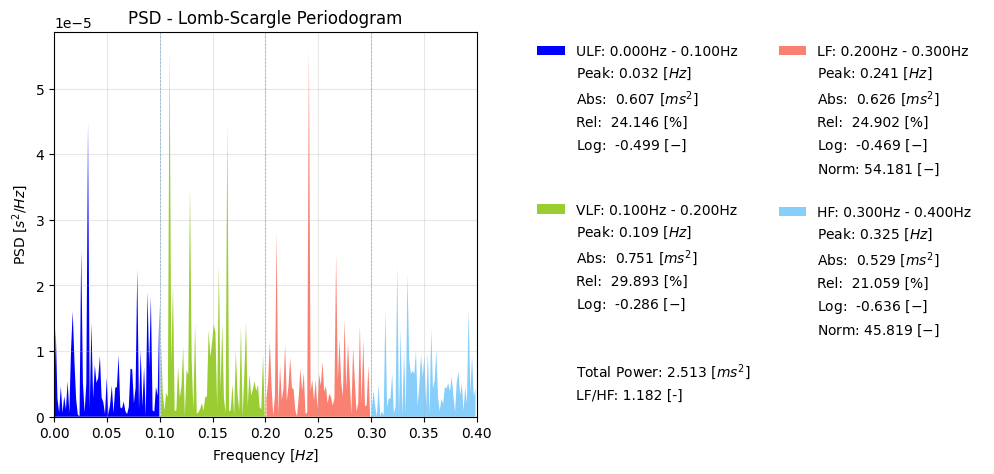

In [44]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.lomb_psd(nni, fbands=fbands)

###Lomb PSD without parameters.



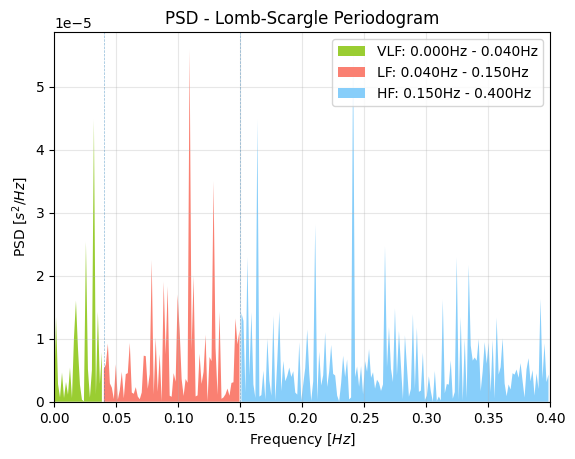

In [45]:
# Compute the PSD without the parameters being shown on the right side of the figure
result = fd.lomb_psd(nni, show_param=False)

##Autoregressive Method: ar_psd()

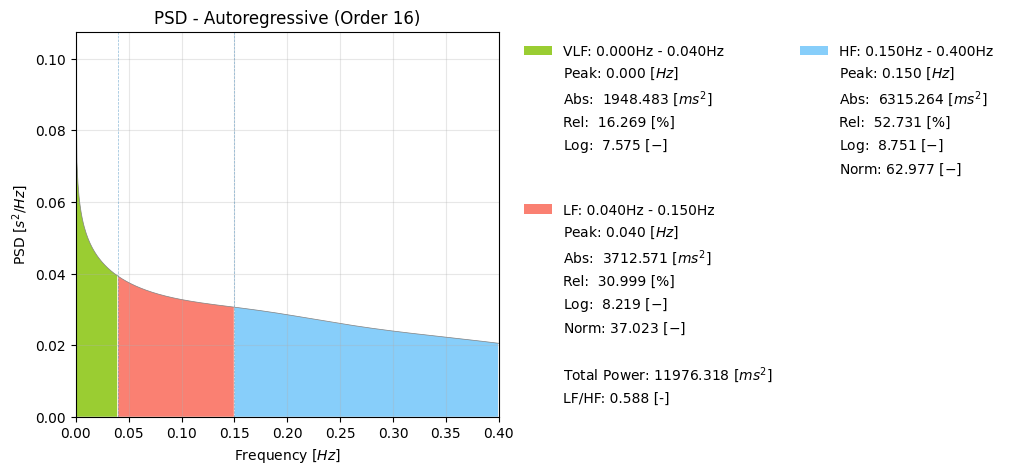

ReturnTuple(ar_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), ar_peak=(0.0, 0.0400390625, 0.150390625), ar_abs=(1948.4826812394344, 3712.570759126146, 6315.264124691453), ar_rel=(16.269464053996597, 30.999267838039046, 52.731268107964354), ar_log=(7.574806236486471, 8.2194798426266, 8.750724858880886), ar_norm=(37.02265545992686, 62.97734454007314), ar_ratio=0.5878726029226106, ar_total=11976.317565057034, ar_nfft=4096, ar_order=16, ar_resampling_frequency=4, ar_interpolation='cubic', ar_plot=<Figure size 1200x500 with 2 Axes>)


In [46]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSD and frequency domain parameters using the NNI series
result = fd.ar_psd(nni)

# Access peak frequencies using the key 'ar_peak'
print(result)

###Autoregressive PSD with custom frequency bands.

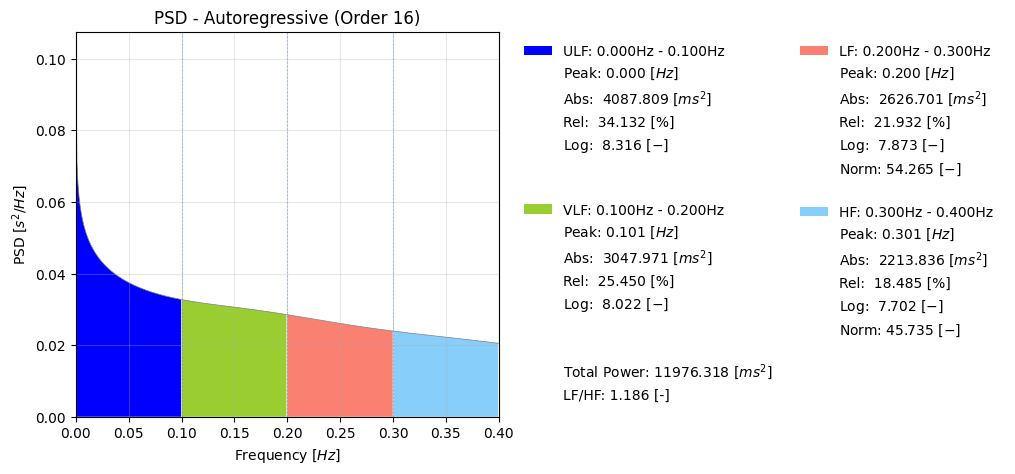

ReturnTuple(ar_bands=ReturnTuple(ulf=[0.0, 0.1], vlf=[0.1, 0.2], lf=[0.2, 0.3], hf=[0.3, 0.4]), ar_peak=(0.0, 0.1005859375, 0.2001953125, 0.30078125), ar_abs=(4087.808824602115, 3047.9714852530483, 2626.7009689881593, 2213.8362862137105), ar_rel=(34.13243513623085, 25.44998885255038, 21.93245924483508, 18.485116766383673), ar_log=(8.31576436577097, 8.022231561530837, 7.8734839533579954, 7.702482165734942), ar_norm=(54.26465763000548, 45.73534236999452), ar_ratio=1.186492870021823, ar_total=11976.317565057034, ar_nfft=4096, ar_order=16, ar_resampling_frequency=4, ar_interpolation='cubic', ar_plot=<Figure size 1200x500 with 2 Axes>)


In [47]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.ar_psd(nni, fbands=fbands)

# Access peak frequencies using the key 'ar_peak'
print(result)

###PSD plot without parameters.



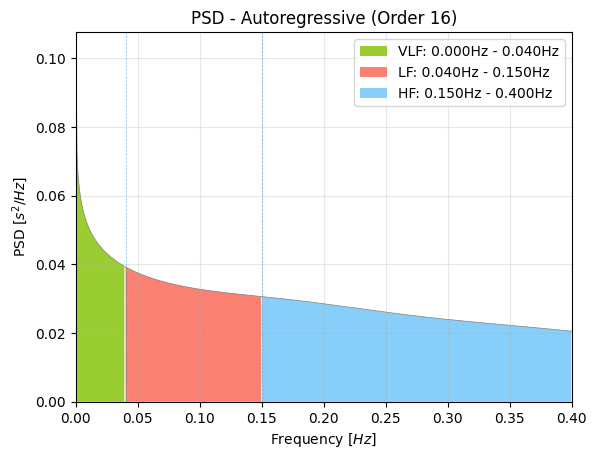

ReturnTuple(ar_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), ar_peak=(0.0, 0.0400390625, 0.150390625), ar_abs=(1948.4826812394344, 3712.570759126146, 6315.264124691453), ar_rel=(16.269464053996597, 30.999267838039046, 52.731268107964354), ar_log=(7.574806236486471, 8.2194798426266, 8.750724858880886), ar_norm=(37.02265545992686, 62.97734454007314), ar_ratio=0.5878726029226106, ar_total=11976.317565057034, ar_nfft=4096, ar_order=16, ar_resampling_frequency=4, ar_interpolation='cubic', ar_plot=<Figure size 640x480 with 1 Axes>)


In [48]:
# Compute the PSD without the parameters being shown on the right side of the figure
result = fd.ar_psd(nni, show_param=False)

# Access peak frequencies using the key 'ar_peak'
print(result)

##2D PSD Comparison Plot: psd_comparison()

In [49]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSDs and the comparison plot using the Welch's method and 100s segments
result = fd.psd_comparison(nni=nni, duration=100, method='welch')

# Access peak frequencies of the first segment using the key 'fft_peak'
print(result)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSDs with custom frequency bands
result = fd.psd_comparison(nni=nni, duration=100, method='welch', fbands=fbands)


##3D PSD Waterfall Plot: psd_waterfall()

In [53]:
# Import packages
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = df2["RR"]

# Compute the PSDs and the comparison plot using the Welch's method and 60s segments
result = fd.psd_waterfall(nni=nni, duration=100, method='welch')

# Access peak frequencies of the first segment using the key 'fft_peak'
print(result)

<Figure size 1000x400 with 0 Axes>

ReturnTuple(seg2949=ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.037109375, 0.0400390625, 0.16796875), fft_abs=(277.8657195731081, 208.61384301182213, 42.67562728832265), fft_rel=(52.51119612748474, 39.42394348655842, 8.064860385956836), fft_log=(5.627137973879076, 5.3404849018788525, 3.753627967771597), fft_norm=(83.01734360880697, 16.98265639119303), fft_ratio=4.888360318698941, fft_total=529.1551898732529, fft_nfft=4096, fft_window='hamming', fft_resampling_frequency=4, fft_interpolation='cubic'), seg2948=ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.0185546875, 0.0400390625, 0.173828125), fft_abs=(8391.203169135906, 777.0238461337316, 180.85169649525008), fft_rel=(89.75433224854989, 8.311234401694833, 1.9344333497552668), fft_log=(9.034939194321066, 6.655471039901522, 5.197677339030084), fft_norm=(81.11949951254782, 18.880500487452178), fft_ratio=4.296469766066

In [54]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSDs with custom frequency bands
result = fd.psd_waterfall(nni=nni, duration=100, method='welch', fbands=fbands)

<Figure size 1000x400 with 0 Axes>

In [55]:
# Define input parameters for the 'welch_psd()' function & plot the PSD comparison
kwargs_welch = {'nfft': 2**8, 'detrend': False, 'window': 'hann'}
result = fd.psd_waterfall(nni=nni, duration=100, method='welch', kwargs_method=kwargs_welch)

# Define input parameters for the 'lomb_psd()' function & plot the PSD comparison
kwargs_lomb = {'nfft': 2**8, 'ma_order': 5}
result = fd.psd_waterfall(nni=nni, duration=100, method='lomb', kwargs_method=kwargs_lomb)

# Define input parameters for the 'ar_psd()' function & plot the PSD comparison
kwargs_ar = {'nfft': 2**8, 'order': 30}
result = fd.psd_waterfall(nni=nni, duration=100, method='ar', kwargs_method=kwargs_ar)

<Figure size 1000x400 with 0 Axes>

<ipython-input-55-6ef3f9514a72>:7: UserWarning: Unknown kwargs for 'lomb_psd': ['ma_order']. These kwargs have no effect.
  result = fd.psd_waterfall(nni=nni, duration=100, method='lomb', kwargs_method=kwargs_lomb)


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [56]:
# Define custom input parameters using the kwargs dictionaries
kwargs_welch = {
   'nfft': 2**8,        # Valid key, will be used
   'threshold': 2**8    # Invalid key for the Welch's method domain, will be ignored
}

# Generate PSD comparison plot
result = fd.psd_waterfall(nni=nni, duration=100, method='welch', kwargs=kwargs_welch)

TypeError: ignored

##Domain Level Function: frequency_domain()

In [57]:
# Import packages
import biosppy
import pyhrv.frequency_domain as fd
import pyhrv.tools as tools

# Load sample ECG signal
signal = df2["RR"]
# Get R-peaks series using biosppy
#t, filtered_signal, rpeaks = biosppy.signals.ecg.ecg(signal)[:3]

# Compute NNI series
nni = tools.nn_intervals(t[rpeaks])

# OPTION 1: Compute PSDs using the ECG Signal
signal_results = fd.frequency_domain(signal=filtered_signal)

# OPTION 2: Compute PSDs using the R-peak series
rpeaks_results = fd.frequency_domain(rpeaks=t[rpeaks])

# OPTION 3: Compute PSDs using the 
nni_results = fd.frequency_domain(nni=nni)

TclError: ignored

In [ ]:
# Access peak frequencies from each method (works the same for 'rpeaks_results' and 'nni_results')
print(signal_results['fft_peak'])
print(signal_results['lomb_peak'])
print(signal_results['ar_peak'])

In [ ]:
# Define custom frequency bands and add the ULF band
fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}

# Compute the PSD with custom frequency bands
result = fd.frequency_domain(nni, fbands=fbands)


In [ ]:
# Import packages
import biosppy
import pyhrv.frequency_domain as fd

# Load sample ECG signal
signal = df2["RR"]
# Get R-peaks series using biosppy
t, filtered_signal, rpeaks = biosppy.signals.ecg.ecg(signal)[:3]

# Define input parameters for the 'welch_psd()' function
kwargs_welch = {'nfft': 2**8, 'detrend': False, 'window': 'hann'}

# Define input parameters for the 'lomb_psd()' function
kwargs_lomb = {'nfft': 2**8, 'ma_order': 5}

# Define input parameters for the 'ar_psd()' function
kwargs_ar = {'nfft': 2**8, 'order': 30}

# Compute PSDs using the ECG Signal
signal_results = fd.frequency_domain(signal=filtered_signal, show=True,
kwargs_welch=kwargs_lomb, kwargs_lomb=kwargs_lomb, kwargs_ar=kwargs_ar)

In [ ]:
# Define custom input parameters using the kwargs dictionaries
kwargs_welch = {
   'nfft': 2**8,        # Valid key, will be used
   'threshold': 2**8    # Invalid key for the Welch's method domain, will be ignored
}

# Compute HRV parameters
fd.frequency_domain(nni=nni, kwargs_welch=kwargs_welch)

#Nonlinear Module


##Poincaré: poincare()


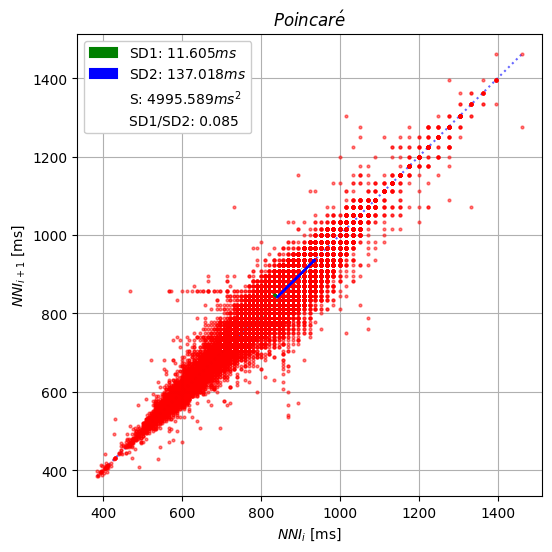

ReturnTuple(poincare_plot=<Figure size 600x600 with 1 Axes>, sd1=11.605347355858802, sd2=137.01832169210974, sd_ratio=11.806481744205433, ellipse_area=4995.588532979444)


In [58]:
# Import packages
import pyhrv
import pyhrv.nonlinear as nl

# Load sample data
nni = df2["RR"]

# Compute Poincaré using NNI series
results = nl.poincare(nni)

# Print SD1
print(results)

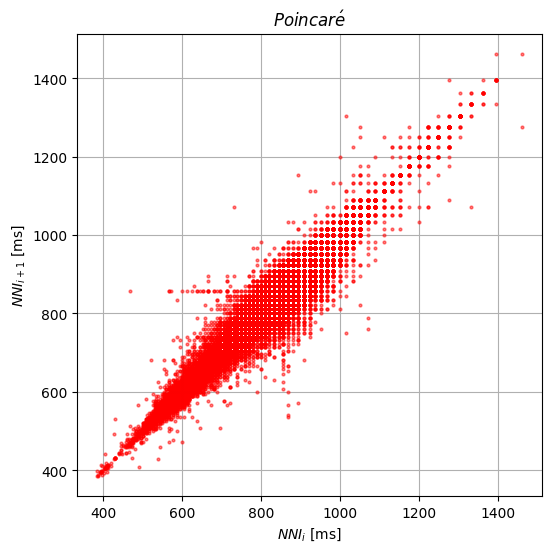

In [59]:
# Show the scatter plot without the fitted ellipse, the SD1 & SD2 vectors and the legend
results = nl.poincare(nni, ellipse=False, vectors=False, legend=False)

##Sample Entropy: sample_entropy()

In [ ]:
# Import packages
import pyhrv
import pyhrv.nonlinear as nl

# Load sample data
nni = df2["RR"]
# Compute Sample Entropy using NNI series
results = nl.sample_entropy(nni)

# Print Sample Entropy
print(results)


ReturnTuple(sampen=0.4646592927109122)


##Detrended Fluctuation Analysis: dfa()

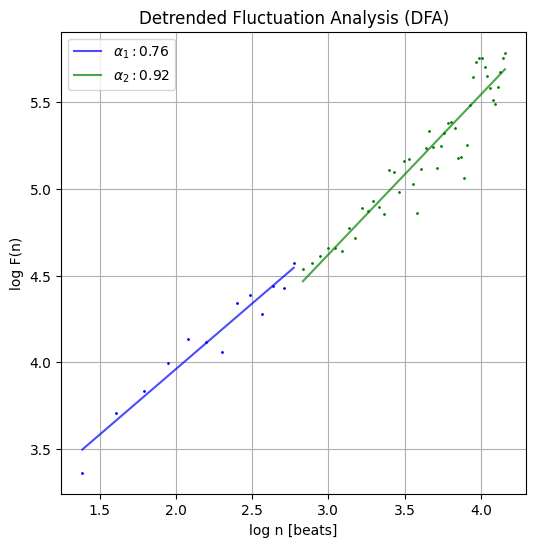

ReturnTuple(dfa_plot=<Figure size 600x600 with 1 Axes>, dfa_alpha1=0.7561188632100411, dfa_alpha2=0.9222817929961094, dfa_alpha1_beats=range(4, 17), dfa_alpha2_beats=range(17, 65))


In [61]:
# Import packages
import pyhrv
import pyhrv.nonlinear as nl

# Load sample data
nni = pyhrv.utils.load_sample_nni()

# Compute DFA using NNI series
results = nl.dfa(nni)

# Print DFA alpha values
print(results)

##Domain Level Function: nonlinear()

In [62]:
# Import packages
import biosppy
import pyhrv.nonlinear as nl
import pyhrv.tools as tools

# Load sample ECG signal
signal = df2["RR"]

# Get R-peaks series using biosppy
t, filtered_signal, rpeaks = biosppy.signals.ecg.ecg(signal)[:3]

# Compute NNI series
nni = tools.nn_intervals(t[rpeaks])

# OPTION 1: Compute using the ECG Signal
signal_results = nl.nonlinear(signal=filtered_signal)

# OPTION 2: Compute using the R-peak series
rpeaks_results = nl.nonlinear(rpeaks=t[rpeaks])

# OPTION 3: Compute using the
nni_results = nl.nonlinear(nni=nni)

TclError: ignored

<ipython-input-63-da13dbb9810c>:8: UserWarning: Unknown kwargs for 'poincare()': ['nfft']. These kwargs have no effect.
  nl.nonlinear(nni=nni, kwargs_poincare=kwargs_poincare)


ReturnTuple(poincare_plot=<Figure size 600x600 with 1 Axes>, sd1=71.63036373757002, sd2=114.78511837857461, sd_ratio=1.6024645470056433, ellipse_area=25830.48826944046, sampen=1.7122387639675827, dfa_plot=<Figure size 600x600 with 1 Axes>, dfa_alpha1=0.6774761193568567, dfa_alpha2=0.9321107914280878, dfa_alpha1_beats=range(4, 17), dfa_alpha2_beats=range(17, 65))

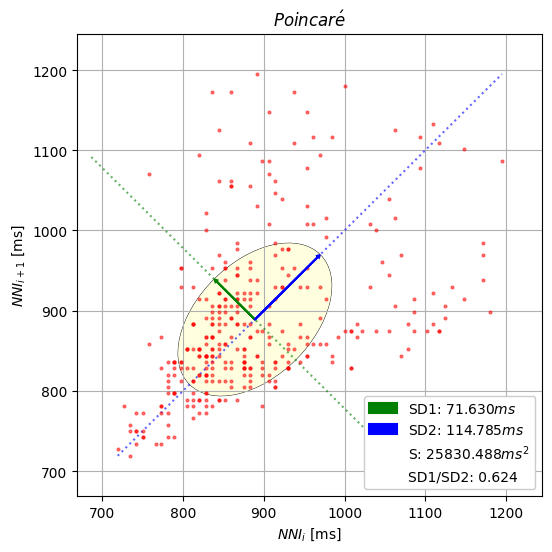

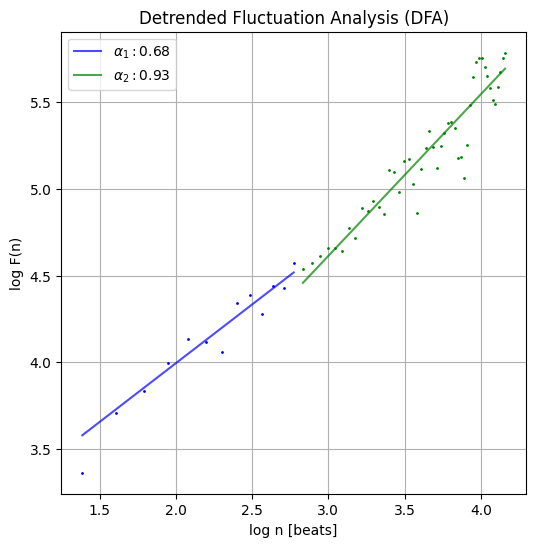

In [63]:
# Define custom input parameters using the kwargs dictionaries
kwargs_poincare = {
   'ellipse': True,     # Valid key, will be used
   'nfft': 2**8         # Invalid key for the time domain, will be ignored
}

# Compute HRV parameters
nl.nonlinear(nni=nni, kwargs_poincare=kwargs_poincare)




---



---

